
# Latin Hypercube Sampling

This example shows the use of the Latin Hypercube sampling class. In particular:


- How to define the Latin Hypercube sampling method supported by UQpy
- How to use different sampling criteria
- How to plot the 2D samples



Initially we have to import the necessary modules.



In [1]:
from UQpy.sampling import LatinHypercubeSampling
import matplotlib.pyplot as plt
from UQpy.distributions.collection.Uniform import Uniform
from UQpy.sampling.stratified_sampling.latin_hypercube_criteria import *

## Define Latin Hypercube sampling class
In order to initialize the LatinHypercube sampling class, the user needs to define a list of distributions
for each one of the parameters that need to be sampled.

Apart from the distributions list, the number of samples  :code:`nsamples` to be drawn is required.
The :code:`random_state` parameter defines the seed of the random generator.

Finally, the design criterion can be defined by the user. The default case is the :class:`.Random`.
For more details on the various criteria you can refer to the documentation of the criteria
:class:`.Random`, :class:`.Centered`, :class:`.Maximin`, :class:`.MinCorrelation`



In [2]:
dist1 = Uniform(loc=0., scale=1.)
dist2 = Uniform(loc=0., scale=1.)

lhs_random = LatinHypercubeSampling(distributions=[dist1, dist2], nsamples=5,
                                    random_state=np.random.RandomState(789),
                                    criterion=Random())

lhs_centered = LatinHypercubeSampling(distributions=[dist1, dist2], criterion=Centered(),
                                      random_state=np.random.RandomState(789),
                                      nsamples=5)

lhs_maximin = LatinHypercubeSampling(distributions=[dist1, dist2],
                                     random_state=np.random.RandomState(789),
                                     criterion=MaxiMin(metric=DistanceMetric.CHEBYSHEV),
                                     nsamples=5)

lhs_mincorrelate = LatinHypercubeSampling(distributions=[dist1, dist2],
                                          random_state=np.random.RandomState(789),
                                          criterion=MinCorrelation(iterations=100),
                                          nsamples=5)

## Plot the generated samples
The :code:`samples` attribute of the latin hypercube class is a numpy array of with shape
:code:`(nsamples, len(distributions))`
Both :code:`samples` and :code:`samplesU01` are populated at the same time since the Latin Hypercube samples are
initially drawn in the unit hypercube, thus in contrast to Monte Carlo sampling no transformation is required.
Using the :py:meth:`run` method to generate samples replaces the previously created ones.



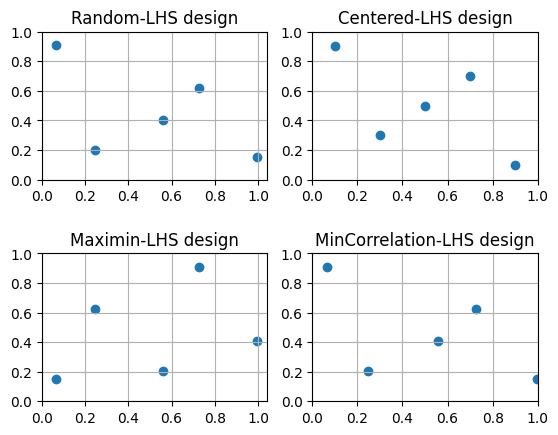

In [3]:
# plot the samples
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(hspace=0.5)
axs[0, 0].set_title('Random-LHS design')
axs[0, 0].scatter(lhs_random._samples[:, 0], lhs_random._samples[:, 1])
axs[0, 0].set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
axs[0, 0].set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
axs[0, 0].yaxis.grid(True)
axs[0, 0].xaxis.grid(True)


axs[0, 1].set_title('Centered-LHS design')
axs[0, 1].scatter(lhs_centered._samples[:, 0], lhs_centered._samples[:, 1])
axs[0, 1].set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
axs[0, 1].set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
axs[0, 1].yaxis.grid(True)
axs[0, 1].xaxis.grid(True)


axs[1, 0].set_title('Maximin-LHS design')
axs[1, 0].scatter(lhs_maximin._samples[:, 0], lhs_maximin._samples[:, 1])
axs[1, 0].set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
axs[1, 0].set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
axs[1, 0].yaxis.grid(True)
axs[1, 0].xaxis.grid(True)


axs[1, 1].set_title('MinCorrelation-LHS design')
axs[1, 1].scatter(lhs_random._samples[:, 0], lhs_random._samples[:, 1])
axs[1, 1].set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
axs[1, 1].set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
axs[1, 1].yaxis.grid(True)
axs[1, 1].xaxis.grid(True)

plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()